<h1 align="center">Opening <em>diagfi.nc</em> and plotting useful variables</h1>

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.colors import LinearSegmentedColormap
from skimage import measure
import matplotlib.colors as mcolors
import os
import re
from glob import glob
import matplotlib as mpl

mpl.rcParams['axes.titlesize'] = 17 
mpl.rcParams['axes.labelsize'] = 15      
mpl.rcParams['xtick.labelsize'] = 14    
mpl.rcParams['ytick.labelsize'] = 14     
mpl.rcParams['legend.fontsize'] = 14 

time_index = -1

In [2]:
diagfi_path = ""

Lecture de C:\Users\fxmey\Documents\ENS\STAGE M1\Couplage_GCM_bio_v0\Diagfi_new\diagfi0.nc...
Lecture de C:\Users\fxmey\Documents\ENS\STAGE M1\Couplage_GCM_bio_v0\Diagfi_new\diagfi1.nc...
Lecture de C:\Users\fxmey\Documents\ENS\STAGE M1\Couplage_GCM_bio_v0\Diagfi_new\diagfi2.nc...
Lecture de C:\Users\fxmey\Documents\ENS\STAGE M1\Couplage_GCM_bio_v0\Diagfi_new\diagfi3.nc...
Lecture de C:\Users\fxmey\Documents\ENS\STAGE M1\Couplage_GCM_bio_v0\Diagfi_new\diagfi4.nc...
Lecture de C:\Users\fxmey\Documents\ENS\STAGE M1\Couplage_GCM_bio_v0\Diagfi_new\diagfi5.nc...
Lecture de C:\Users\fxmey\Documents\ENS\STAGE M1\Couplage_GCM_bio_v0\Diagfi_new\diagfi6.nc...
Lecture de C:\Users\fxmey\Documents\ENS\STAGE M1\Couplage_GCM_bio_v0\Diagfi_new\diagfi7.nc...
Lecture de C:\Users\fxmey\Documents\ENS\STAGE M1\Couplage_GCM_bio_v0\Diagfi_new\diagfi8.nc...
Lecture de C:\Users\fxmey\Documents\ENS\STAGE M1\Couplage_GCM_bio_v0\Diagfi_new\diagfi9.nc...
Lecture de C:\Users\fxmey\Documents\ENS\STAGE M1\Couplage_GC

### Loading *diagfi.nc*

In [3]:
with xr.open_dataset(diagfi_path + "diagfi_global.nc", decode_times=False) as ds:
    ds = ds.load() 


lat = ds['latitude']
lon = ds['longitude']
tsurf = ds['tsurf']
psurf = ds['ps']
time = ds["Time"].values
rnat = ds['rnat']
lakes = ds['h2o_lake_surf']
ASR = ds['ASR']
OLR = ds['OLR']
ISR = ds['ISR']
seaice = ds['sea_ice']
tocean = ds['tslab1']
albedo = ds['ALB']
ASRcs = ds['ASRcs']
OLRcs = ds['OLRcs']

### Plotting ground albedo

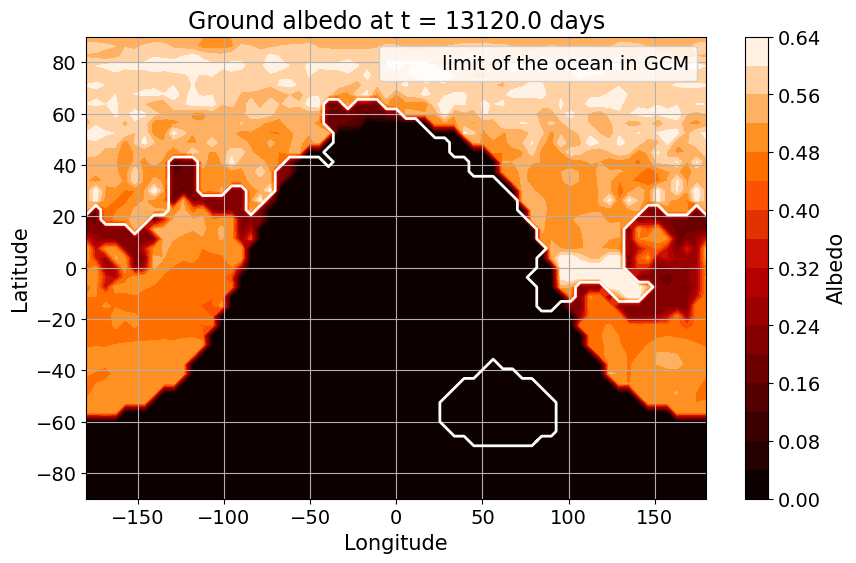

In [4]:
rn = rnat[time_index, :, :]
al = albedo[time_index, :, :]
rnat_binary = rn.values
contours = measure.find_contours(rnat_binary, 0.5)

plt.figure(figsize=(10, 6))
k=0
for contour in contours:
    y, x = contour.T
    plt.plot(np.interp(x, np.arange(len(lon)), lon),
             np.interp(y, np.arange(len(lat)), lat),
             linewidth=2, color='white',label='limit of the ocean in GCM' if k==0 else "")
    k+=1
plt.contourf(lon, lat, al, levels=20,cmap='gist_heat')
plt.title(f"Ground albedo at t = {time[time_index]} days")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="Albedo")
plt.legend()
plt.grid(True)
plt.show()

### Plotting surface temperature

C:\Users\fxmey\AppData\Local\Temp\ipykernel_12856\2516133211.py:33: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  plt.contourf(


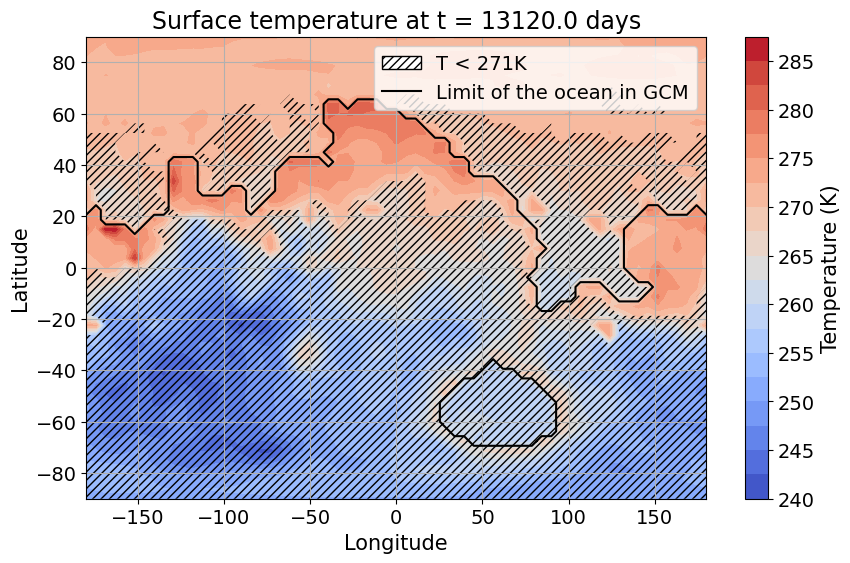

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from skimage import measure
from matplotlib.lines import Line2D

# Extraire les données
rn = rnat[time_index, :, :]
t_surf = tsurf[time_index, :, :]

# Détecter les contours océaniques
rnat_binary = rn.values
contours = measure.find_contours(rnat_binary, 0.5)

# Créer la figure
plt.figure(figsize=(10, 6))

# Tracer les contours océaniques
for i, contour in enumerate(contours):
    y, x = contour.T
    plt.plot(np.interp(x, np.arange(len(lon)), lon),
             np.interp(y, np.arange(len(lat)), lat),
             linewidth=1.5, color='black', label='Limit of the ocean in GCM' if i == 0 else "")

# Tracer le champ de température avec colorbar
cf = plt.contourf(lon, lat, t_surf, levels=20, cmap='coolwarm')

# Tracer les zones T < 271K en hachuré noir
tmin = t_surf.min()
if tmin < 273:
    # Masquer les zones T >= 273K
    mask_cold = np.ma.masked_where(t_surf >= 271, t_surf)
    plt.contourf(
        lon, lat, mask_cold,
        levels=[tmin, 271],
        hatches=['////'],
        colors='none',
        edgecolor='black'
    )
    legend_elements = [
    Patch(facecolor='white', hatch='////', edgecolor='black', label='T < 271K'),
     Line2D([0], [0], color='black', linewidth=1.5, label='Limit of the ocean in GCM')
    ]
else:legend_elements = [
     Line2D([0], [0], color='black', linewidth=1.5, label='Limit of the ocean in GCM')
    ]
# Ajouter la colorbar
plt.colorbar(cf, label="Temperature (K)")



# Afficher la légende
plt.legend(handles=legend_elements, loc='upper right')

# Mise en forme
plt.title(f"Surface temperature at t = {time[time_index]} days")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


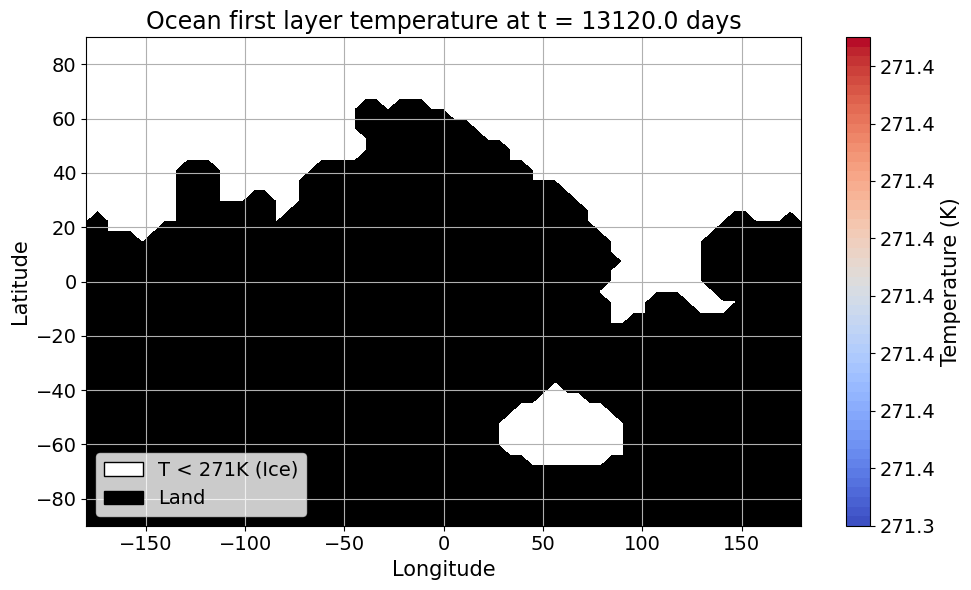

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import get_cmap
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.patches import Patch
from skimage import measure
from matplotlib.ticker import FuncFormatter

# --- Préparation des données ---
t_oce = tocean[time_index, :, :]
# Masquer les zones où rn < 0.5 (donc on garde que rn >= 0.5)
t_oce_O = np.ma.masked_where(t_oce <= 0, t_oce)
t_oce_L = np.ma.masked_where(rn <= 0.5, t_oce)

t_oce_O_frozen = np.ma.masked_where(t_oce > 271.36, t_oce_O) # We put 271.36 K and not 271 K because the temperature does not go below 271.36K

# --- Création de la figure ---
fig, ax = plt.subplots(figsize=(10, 6))

# Afficher t_oce avec les zones rn < 0.5 en noir automatiquement (car masquées)
cf2 = ax.contourf(lon, lat, t_oce, colors=['black'])
cf = ax.contourf(lon, lat, t_oce_O, cmap='coolwarm',levels=50)
cf3 = ax.contourf(lon, lat, t_oce_O_frozen, colors=['white'])

# --- Légende ---
legend_elements = [
    Patch(facecolor='white', edgecolor='black', label='T < 271K (Ice)'),
    Patch(facecolor='black', edgecolor='black', label='Land')
]

# --- Colorbar ---
cbar = fig.colorbar(cf, ax=ax, label="Temperature (K)",)
formatter = FuncFormatter(lambda x, pos: f"{x:.1f}")
cbar.ax.yaxis.set_major_formatter(formatter)

# --- Mise en forme finale ---
ax.legend(handles=legend_elements, loc='lower left')
ax.set_title(f"Ocean first layer temperature at t = {time[time_index]} days")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(True)
plt.tight_layout()
plt.show()

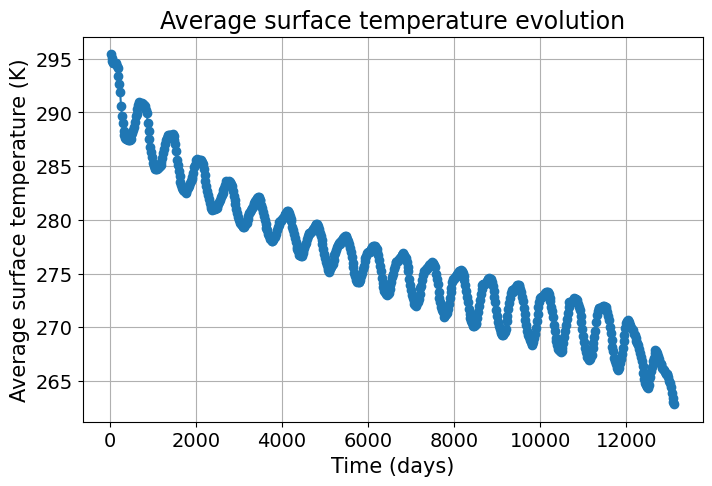

In [8]:
tsurf_mean = tsurf.mean(dim=("latitude", "longitude"))

plt.figure(figsize=(8, 5))
plt.plot(time, tsurf_mean, marker='o')
plt.title("Average surface temperature evolution")
plt.xlabel("Time (days)")
plt.ylabel("Average surface temperature (K)")
plt.grid(True)
plt.show()

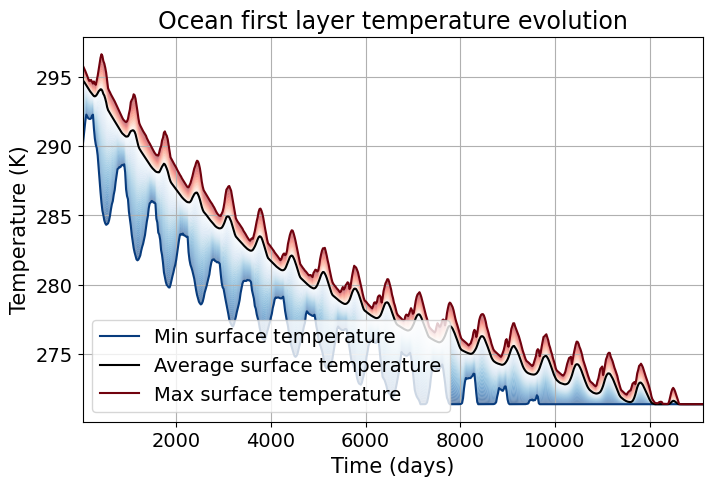

In [9]:
n2 = 50
n1 = 20

tsea = tocean.where(tocean > 0)
# Moyenne spatiale (latitude et longitude)
tsea_mean = tsea.mean(dim=("latitude", "longitude"))
tsea_min = tsea.min(dim=("latitude", "longitude"))
tsea_max = tsea.max(dim=("latitude", "longitude"))
diff1 = tsea_max-tsea_mean
diff1 = diff1 / n1
diff2 = tsea_mean-tsea_min
diff2 = diff2 / n2

valid_mask = ~np.isnan(tsea_mean)
ttime = time[valid_mask]

plt.figure(figsize=(8, 5))
plt.plot(time, tsea_min,color=plt.cm.Blues(1-1/n1),label='Min surface temperature')
plt.plot(time, tsea_mean,color='black',label='Average surface temperature')
plt.plot(time, tsea_max, color=plt.cm.Reds(1-1/n2),label='Max surface temperature')
for i in range(n1):
    plt.fill_between(time,tsea_mean+i*diff1,tsea_mean+(i+1)*diff1,color=plt.cm.Reds((i+1)/n1),alpha=0.6,edgecolor='none')
for i in range(n2):
    plt.fill_between(time,tsea_min+i*diff2,tsea_min+(i+1)*diff2,color=plt.cm.Blues(1-(i+1)/n2),alpha=0.6,edgecolor='none')

legend = plt.legend(loc="lower left")
legend.get_frame().set_facecolor('white')      
legend.get_frame().set_alpha(1.0)              
legend.get_frame().set_edgecolor('black')      
legend.get_frame().set_linewidth(1.5)       
plt.legend(loc="lower left")
plt.title("Ocean first layer temperature evolution")
plt.xlabel("Time (days)")
plt.ylabel("Temperature (K)")
plt.xlim(min(ttime),max(ttime))
plt.grid(True)
plt.show()

### Plotting surface presssure

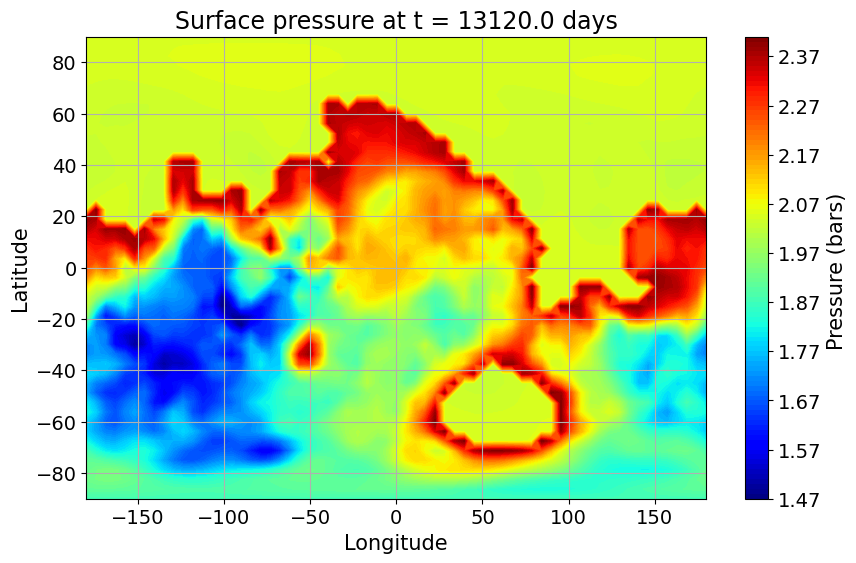

In [10]:
p_surf = psurf[time_index, :, :]

plt.figure(figsize=(10, 6))
plt.contourf(lon, lat, p_surf/1e5, levels=100,cmap='jet')
plt.title(f"Surface pressure at t = {time[time_index]} days")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="Pressure (bars) ")
plt.grid(True)
plt.show()

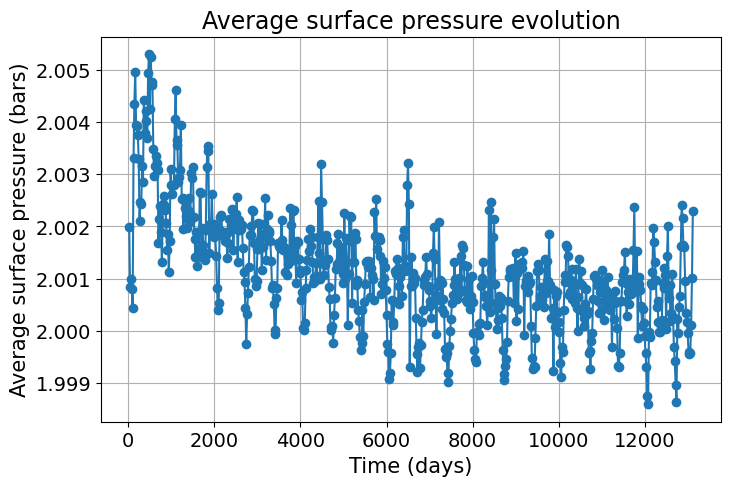

In [11]:
psurf_mean = psurf.mean(dim=("latitude", "longitude"))

plt.figure(figsize=(8, 5))
plt.plot(time, psurf_mean/1e5, marker='o')
plt.title("Average surface pressure evolution")
plt.xlabel("Time (days)")
plt.ylabel("Average surface pressure (bars)")
plt.grid(True)
plt.show()

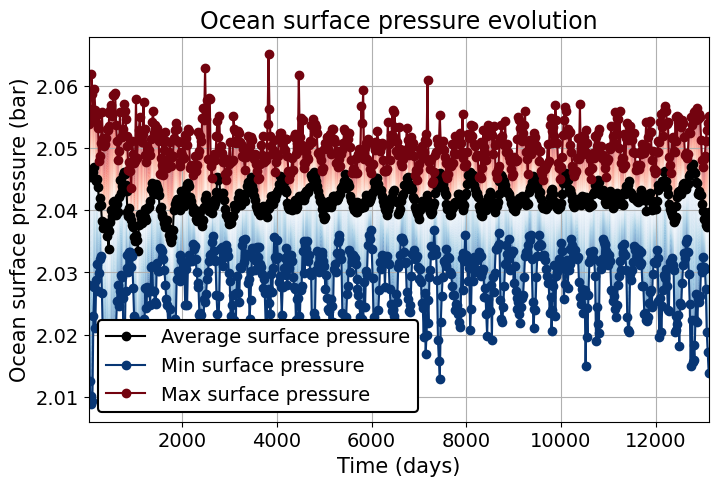

In [12]:
n = 40

psea = psurf.where(rnat == 0)

psea_mean = psea.mean(dim=("latitude", "longitude"))/1e5
psea_min = psea.min(dim=("latitude", "longitude"))/1e5
psea_max = psea.max(dim=("latitude", "longitude"))/1e5

diff1 = psea_max-psea_mean
diff1 = diff1 / n
diff2 = psea_mean-psea_min
diff2 = diff2 / n

plt.figure(figsize=(8, 5))
plt.plot(time, psea_mean, marker='o',color='black',label='Average surface pressure')
plt.plot(time, psea_min, marker='o',color=plt.cm.Blues(1-1/n),label='Min surface pressure')
plt.plot(time, psea_max, marker='o',color=plt.cm.Reds(1-1/n),label='Max surface pressure')
for i in range(n):
    plt.fill_between(time,psea_mean+i*diff1,psea_mean+(i+1)*diff1,color=plt.cm.Reds((i+1)/n),alpha=0.6,edgecolor='none')
    plt.fill_between(time,psea_min+i*diff2,psea_min+(i+1)*diff2,color=plt.cm.Blues(1-(i+1)/n),alpha=0.6,edgecolor='none')

legend = plt.legend(loc="lower left")
legend.get_frame().set_facecolor('white')      
legend.get_frame().set_alpha(1.0)              
legend.get_frame().set_edgecolor('black')      
legend.get_frame().set_linewidth(1.5)          
plt.title("Ocean surface pressure evolution")
plt.xlabel("Time (days)")
plt.ylabel("Ocean surface pressure (bar)")
plt.xlim(min(time),max(time))
plt.grid(True)
plt.show()

### Plotting nature of the surface

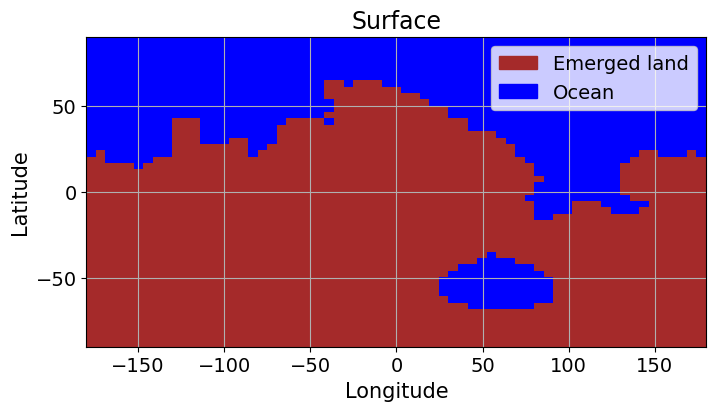

In [13]:
rn = rnat[time_index, :, :]

mask_1 = (rn == 1).astype(int)
mask_0 = (rn == 0).astype(int)

plt.figure(figsize=(8, 6))

colors = ["blue","brown"]
cmap_custom = LinearSegmentedColormap.from_list("brown_blue", colors)

plt.imshow(mask_0, cmap=cmap_custom,  extent=[lon.min(), lon.max(), lat.min(), lat.max()])
plt.imshow(mask_1, cmap=cmap_custom,  extent=[lon.min(), lon.max(), lat.min(), lat.max()])

legend_elements = [
    Patch(facecolor='brown', edgecolor='brown', label='Emerged land'),
    Patch(facecolor='blue', edgecolor='blue', label='Ocean')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.title("Surface")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()




### Plotting lakes

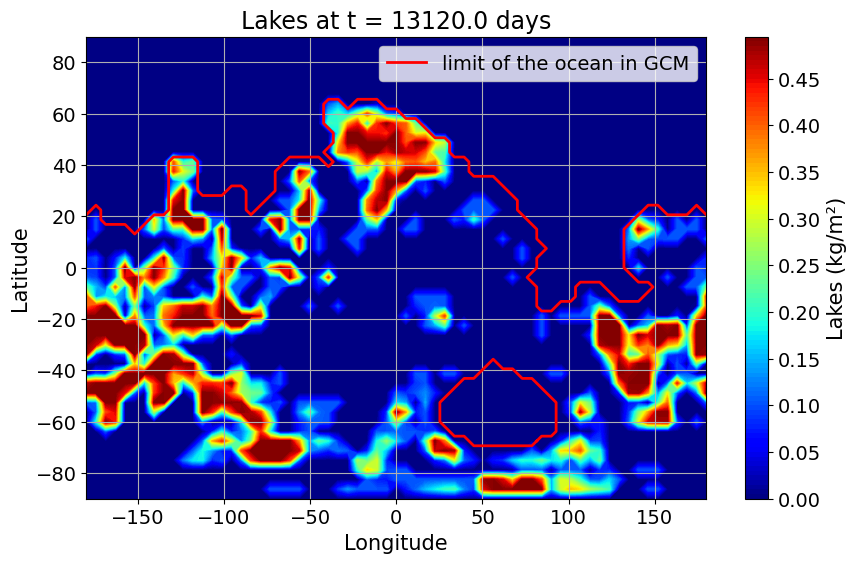

In [14]:
maplake = lakes[time_index, :, :]

rnat_binary = rn.values
contours = measure.find_contours(rnat_binary, 0.5)

plt.figure(figsize=(10, 6))
plt.contourf(lon, lat, maplake, levels=100,cmap='jet')
k=0
for contour in contours:
    y, x = contour.T
    plt.plot(np.interp(x, np.arange(len(lon)), lon),
             np.interp(y, np.arange(len(lat)), lat),
             linewidth=2, color='red',label='limit of the ocean in GCM' if k==0 else "")
    k+=1
plt.title(f"Lakes at t = {time[time_index]} days")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="Lakes (kg/m²)")
plt.grid(True)
plt.legend()
plt.show()

### Plotting ASR/ISR/OLR

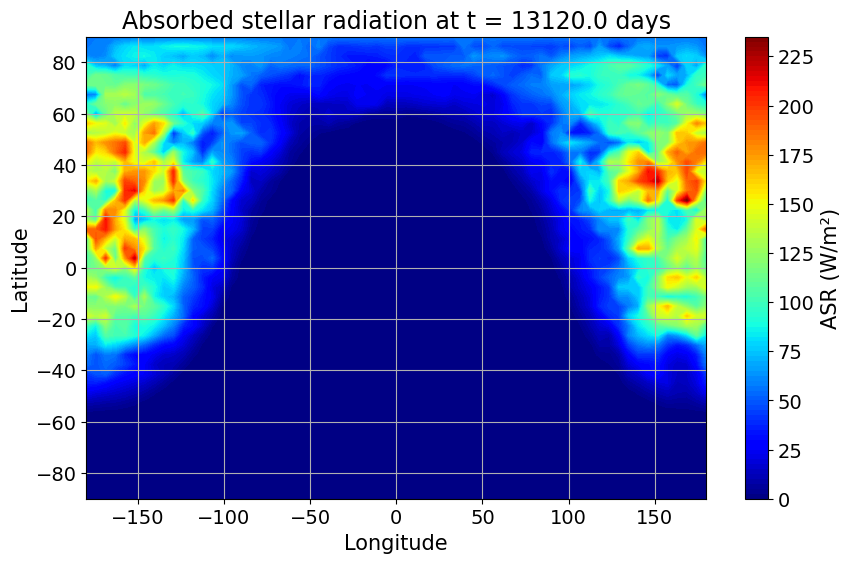

In [15]:
dat = ASR[time_index, :, :]
plt.figure(figsize=(10, 6))
plt.contourf(lon, lat, dat, levels=100,cmap='jet')
plt.title(f"Absorbed stellar radiation at t = {time[time_index]} days")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="ASR (W/m²)")
plt.grid(True)
plt.show()

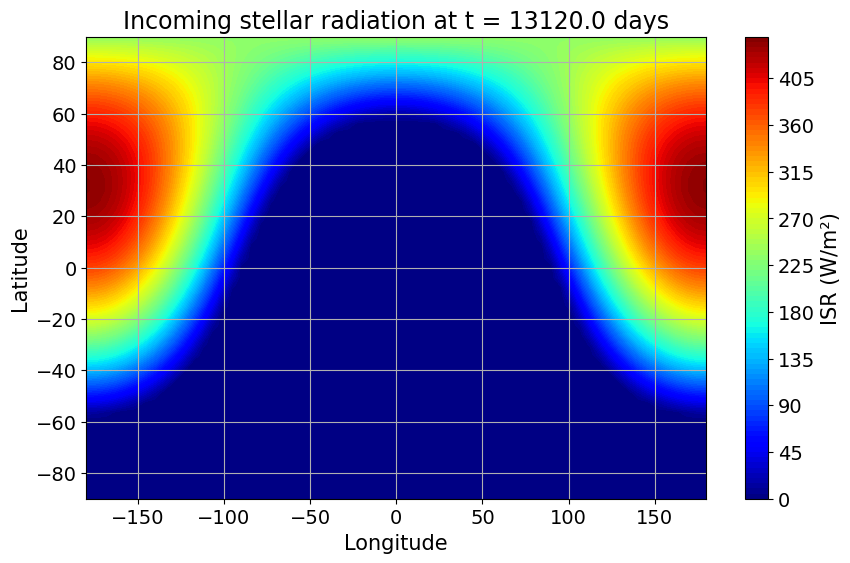

In [16]:
dat = ISR[time_index, :, :]
plt.figure(figsize=(10, 6))
plt.contourf(lon, lat, dat, levels=100,cmap='jet')
plt.title(f"Incoming stellar radiation at t = {time[time_index]} days")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="ISR (W/m²)")
plt.grid(True)
plt.show()

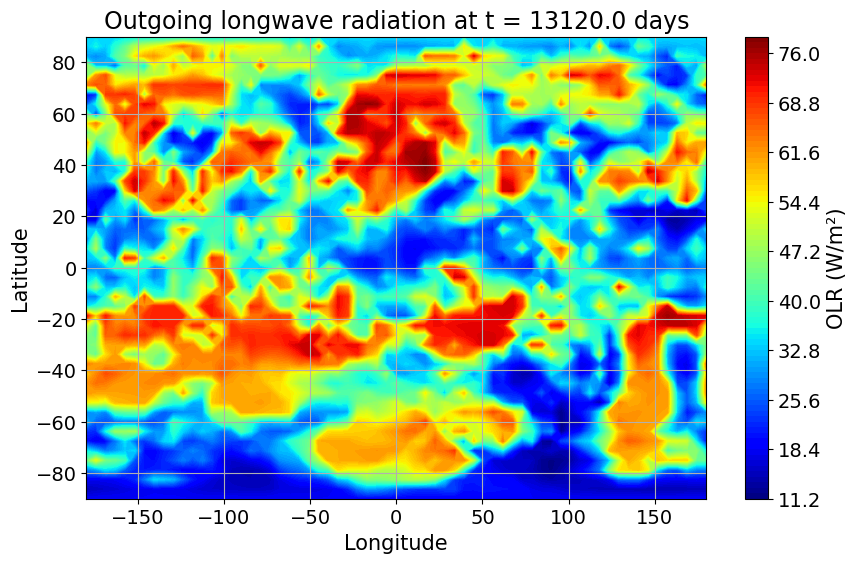

In [17]:
dat = OLR[time_index, :, :]
plt.figure(figsize=(10, 6))
plt.contourf(lon, lat, dat, levels=100,cmap='jet')
plt.title(f"Outgoing longwave radiation at t = {time[time_index]} days")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="OLR (W/m²)")
plt.grid(True)
plt.show()

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


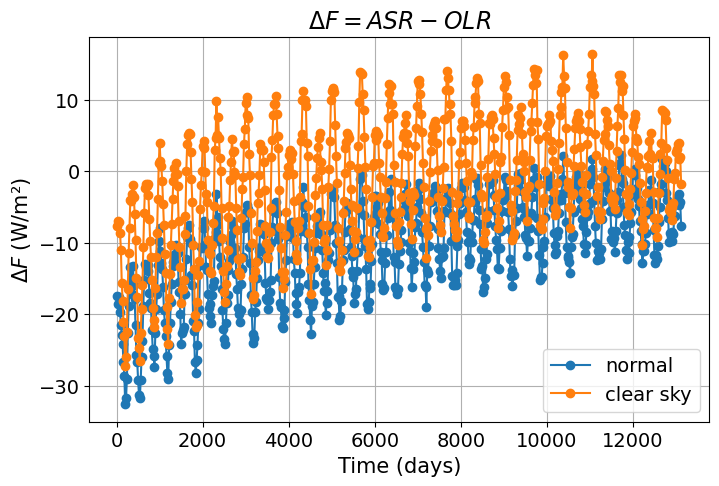

In [18]:
OLR_mean = OLR.mean(dim=("latitude", "longitude"))
ASR_mean = ASR.mean(dim=("latitude", "longitude"))
OLRcs_mean = OLRcs.mean(dim=("latitude", "longitude"))
ASRcs_mean = ASRcs.mean(dim=("latitude", "longitude"))

plt.figure(figsize=(8, 5))
plt.plot(time, ASR_mean-OLR_mean, marker='o',label='normal')
plt.plot(time, ASRcs_mean-OLRcs_mean, marker='o',label='clear sky')
plt.title(r"$\Delta F = ASR - OLR $")
plt.xlabel("Time (days)")
plt.ylabel(r"$\Delta F$ (W/m²)")
plt.grid(True)
plt.legend()
plt.show()

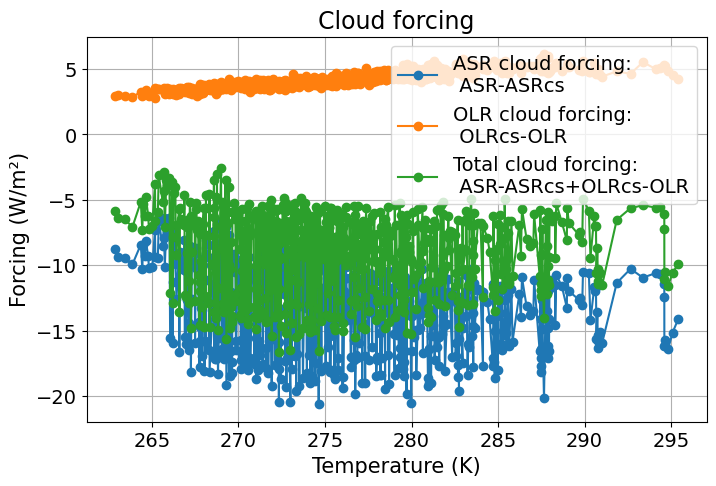

In [20]:
OLR_mean = np.array(OLR.mean(dim=("latitude", "longitude")))
ASR_mean = np.array(ASR.mean(dim=("latitude", "longitude")))
OLRcs_mean = np.array(OLRcs.mean(dim=("latitude", "longitude")))
ASRcs_mean = np.array(ASRcs.mean(dim=("latitude", "longitude")))

tsurf_array = np.array(tsurf_mean)
sorted_array = np.argsort(tsurf_array)

tsurf_sort = tsurf_mean[sorted_array]
OLR_sort = OLR_mean[sorted_array]
OLRcs_sort = OLRcs_mean[sorted_array]
ASR_sort = ASR_mean[sorted_array]
ASRcs_sort = ASRcs_mean[sorted_array]


plt.figure(figsize=(8, 5))
plt.plot(tsurf_sort, ASR_sort-ASRcs_sort, marker='o',label="ASR cloud forcing: \n ASR-ASRcs")
plt.plot(tsurf_sort, OLRcs_sort-OLR_sort, marker='o',label="OLR cloud forcing: \n OLRcs-OLR")
plt.plot(tsurf_sort,ASR_sort-ASRcs_sort+OLRcs_sort-OLR_sort,marker='o',label=f'Total cloud forcing: \n ASR-ASRcs+OLRcs-OLR')
plt.title(r"Cloud forcing")
plt.xlabel("Temperature (K)")
plt.ylabel(r"Forcing (W/m²)")
plt.grid(True)
plt.legend()
plt.show()

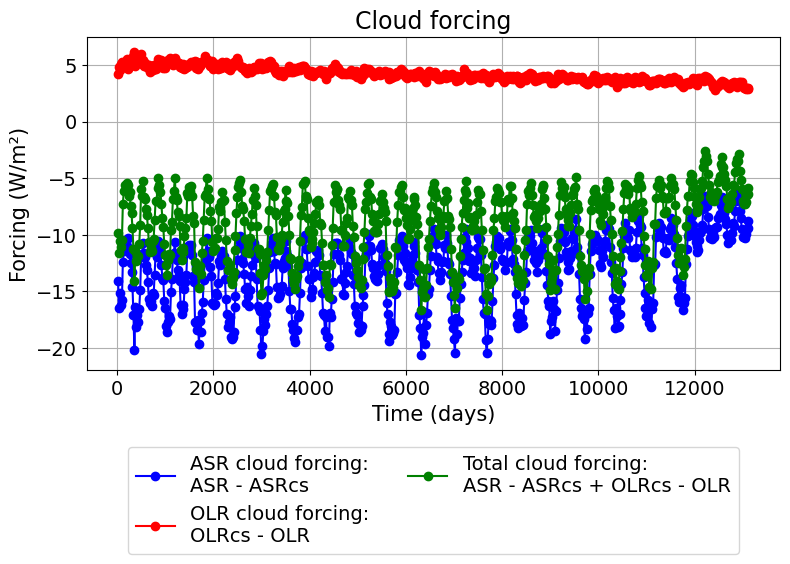

In [21]:
OLR_mean = np.array(OLR.mean(dim=("latitude", "longitude")))
ASR_mean = np.array(ASR.mean(dim=("latitude", "longitude")))
OLRcs_mean = np.array(OLRcs.mean(dim=("latitude", "longitude")))
ASRcs_mean = np.array(ASRcs.mean(dim=("latitude", "longitude")))

plt.figure(figsize=(8, 6))
plt.plot(time, ASR_mean-ASRcs_mean, marker='o', label="ASR cloud forcing:\nASR - ASRcs",color='blue')
plt.plot(time, OLRcs_mean-OLR_mean, marker='o', label="OLR cloud forcing:\nOLRcs - OLR",color='red')
plt.plot(time, ASR_mean-ASRcs_mean + OLRcs_mean - OLR_mean, marker='o', label="Total cloud forcing:\nASR - ASRcs + OLRcs - OLR",color='green')

plt.title("Cloud forcing")
plt.xlabel("Time (days)")
plt.ylabel("Forcing (W/m²)")
plt.grid(True)

# Légende en dessous
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, frameon=True)

plt.tight_layout()  # pour éviter les chevauchements
plt.show()
